In [1]:
# importing libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Iris Flower Classification\Iris.csv')
print(iris.shape)
iris.head(5)

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete the unnecessary 'Id' column
iris = iris.drop(columns = ['Id'])

In [4]:
# print the first 5 samples of our dataset
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# display dataset statistics
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# display the no. of instances of each 'class'
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# check if null values are present
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualize variation of 'class' w.r.t each attribute

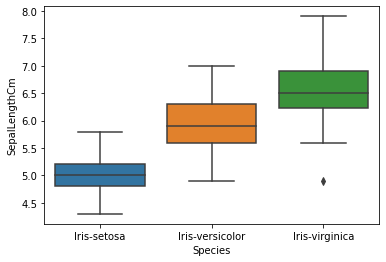

In [8]:
import seaborn as sns

sns.boxplot(x=iris['Species'], y=iris['SepalLengthCm'])
plt.show()

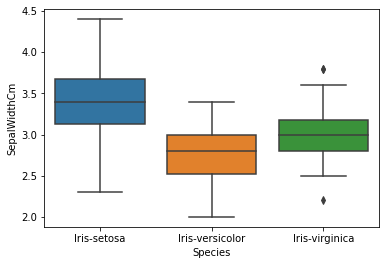

In [9]:
sns.boxplot(x=iris['Species'], y=iris['SepalWidthCm'])
plt.show()

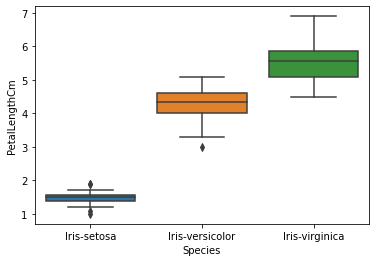

In [10]:
sns.boxplot(x=iris['Species'], y=iris['PetalLengthCm'])
plt.show()

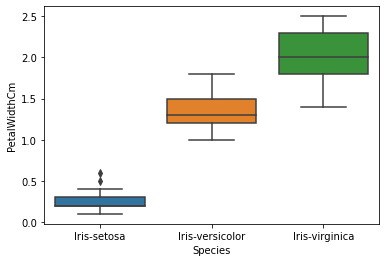

In [11]:
sns.boxplot(x=iris['Species'], y=iris['PetalWidthCm'])
plt.show()

#### Uni-variant plot

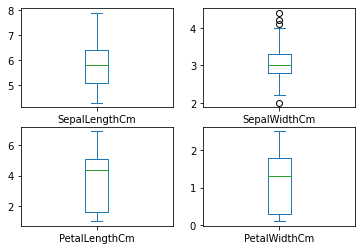

In [12]:
# uni-variant plot
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

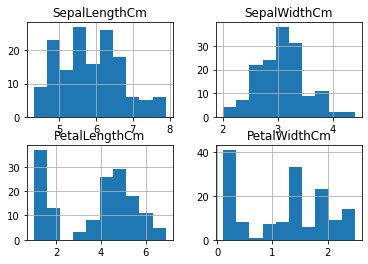

In [13]:
# create a histogram
iris.hist()
plt.show()

#### Scatter plots for each 'class'

In [14]:
# scatter plots for each 'class'
colors = ['red', 'blue', 'orange']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

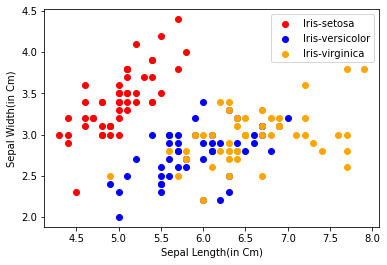

In [15]:
for i in range(3):
    # filter the classes
    x = iris[iris['Species'] == classes[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=classes[i])

plt.xlabel('Sepal Length(in Cm)')
plt.ylabel('Sepal Width(in Cm)')
plt.legend()
plt.show()

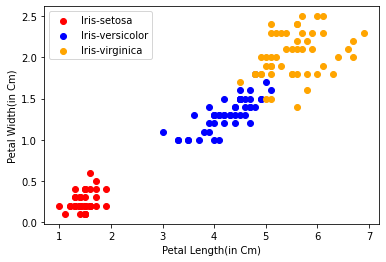

In [16]:
for i in range(3):
    # filter the classes
    x = iris[iris['Species'] == classes[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=classes[i])

plt.xlabel('Petal Length(in Cm)')
plt.ylabel('Petal Width(in Cm)')
plt.legend()
plt.show()

### Label encoding

In [17]:
# Convert the labels into numeric form -> Label encoder
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
iris['Species'] = lbl.fit_transform(iris['Species'])

iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Correlation Matrix

In [18]:
# Correlation Matrix
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


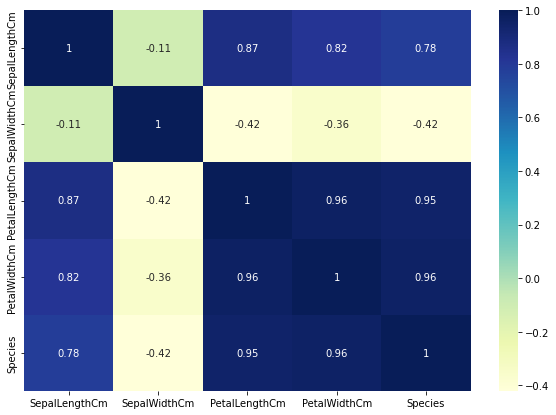

In [19]:
# Display Correlation Matrix in the form of HeatMap
corr_matrix = iris.corr()
plt.figure(figsize=(10,7))

import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap = "YlGnBu")
plt.show()

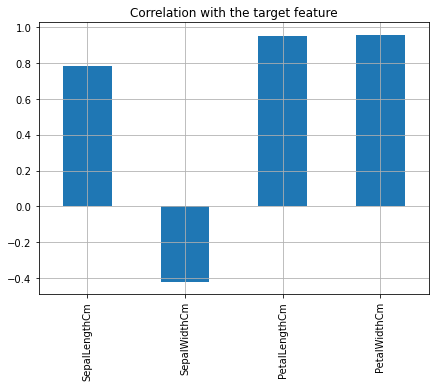

In [20]:
iris.drop('Species', axis=1).corrwith(iris['Species']).plot(kind='bar', grid=True, figsize=(7, 5),
                                                            title="Correlation with the target feature")
plt.show()

### Build our Model

In [21]:
# Define the features and labels
X = iris.drop(columns=['Species'])
y = iris['Species']

In [22]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression model

In [24]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_regressor = LogisticRegression()

# Train the model on the training set
log_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_regressor.predict(X_test)

In [25]:
# Print metrics to get performance
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
# Print the accuracy
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)*100

# Create a dataframe to display accuracy
results_df = pd.DataFrame(data=[["Logistic Regression", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df

,Model,Accuracy(%)
0,Logistic Regression,100.0


### Support Vector Machine (SVM) model

In [27]:
from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_train, y_train))

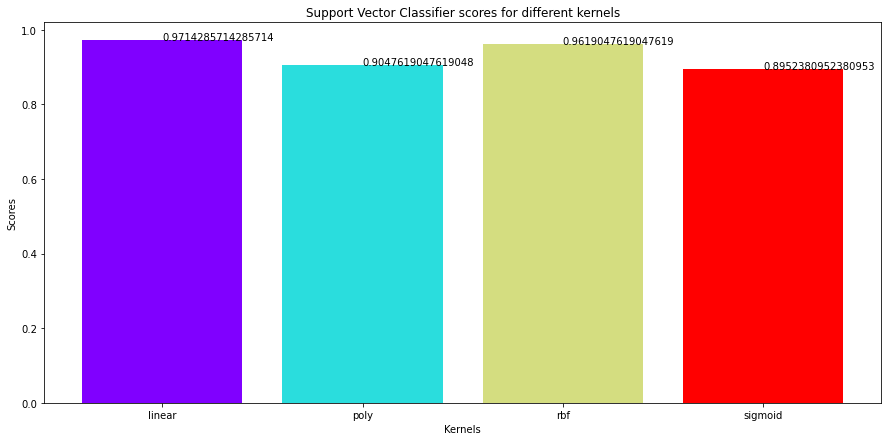

In [28]:
from matplotlib.cm import rainbow

plt.figure(figsize=(15,7))
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)

for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

In [29]:
# Import SVM model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1, probability=True)

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = svm_classifier.predict(X_test)

In [30]:
# Print metrics to get performance
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [31]:
# Print the accuracy
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred1)*100

# Create a dataframe to display accuracy
results_df1 = pd.DataFrame(data=[["Support Vector Machine", score]],
                          columns=['Model', 'Accuracy(%)'])
results_df1

,Model,Accuracy(%)
0,Support Vector Machine,97.777778


In [32]:
# Logistic Regression model has the highest accuracy

In [33]:
results_df = results_df.append(results_df1, ignore_index=True)
results_df

,Model,Accuracy(%)
0,Logistic Regression,100.000000
1,Support Vector Machine,97.777778


### Making predictions

In [34]:
# Finally, we will make predictions
pred = log_regressor.predict(X_test)

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df.head(10)

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [36]:
final_df = df['Predicted']
final_df = df.drop('Actual', axis=1)

In [37]:
X["Species"] = final_df

In [38]:
export_csv = X.to_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Iris Flower Classification\predictions.csv', 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


In [39]:
iris.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [40]:
log_regressor.predict([[5.9, 3.0, 5.1, 1.8]])

array([2])

#### Get the prediction probabilities for each class

In [41]:
pred1 = log_regressor.predict_proba(X_test)
pred2 = svm_classifier.predict_proba(X_test)

final_pred = (pred1+pred2)/2

In [42]:
prob_df = pd.DataFrame(final_pred, columns=['0','1', '2'])
prob_df.head(10)

,0,1,2
0,0.009807,0.912282,0.077911
1,0.954686,0.038382,0.006931
2,0.000626,0.001855,0.997518
3,0.011136,0.826597,0.162267
4,0.003860,0.815749,0.180391
5,0.926668,0.064273,0.009059
6,0.061437,0.915511,0.023053
7,0.004815,0.046771,0.948415
8,0.011229,0.524283,0.464487
9,0.023761,0.948380,0.027859


In [43]:
final_df1 = prob_df['1']
final_df1 = prob_df.drop(['0', '2'],axis=1)

In [44]:
X["Species"] = final_df1

In [45]:
export_csv = X.to_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Iris Flower Classification\prediction_probabilities.csv', 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!


### Saving our models

In [46]:
# dump the ML models into a 'pickle' file
import pickle

pickle.dump(log_regressor, open(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Iris Flower Classification\log_model.pkl", 'wb'))
pickle.dump(svm_classifier, open(r"C:\Users\Rajashri\Desktop\Resume\Resume Projects\Iris Flower Classification\svm_model.pkl", 'wb'))